# Sympy - Python中的符号代数

J.R. Johansson (jrjohansson at gmail.com)

这门课的最新版本[IPython notebook](http://ipython.org/notebook.html) 可以在这里获得[http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

这节课其他的参考书可以在这里找到[http://jrjohansson.github.io](http://jrjohansson.github.io) 。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## 1. 简介

有两个值得注意的Python计算机代数系统（CAS）:

* [SymPy](http://sympy.org/en/index.html) - 这是一个python模块可以被用在任意的Python程序或者是IPython会话中，它提供了强大的计算机代数系统（CAS）特征。
* [Sage](http://www.sagemath.org/) - Sage 是一个全功能的且非常强大的CAS环境，它的目的是提供一个与Mathematica和Maple竞争的开源系统。Sage并不是一个常规的Python模块，而是一个CAS环境用Python作为其编程语言。

Sage在某些方面比SymPy更加强大，但是他们都提供非常完善的CAS功能。SymPy的优点是，它是一个常规的Python模块而且和IPython notebook集成的很好。

在这个课上我们将会学会如何运用SymPy和IPython notebooks。如果你对CAS开源环境感兴趣，我也推荐你去阅读更多关于Sage的内容。

为了开始在Python程序或笔记本中使用SymPy，首先导入模块`sympy`:

In [11]:
from sympy import *

为了得到一个看起来更好的$\LaTeX$格式输出运行：

In [12]:
init_printing()

# 或者使用较旧版本的sympy/ipython，加载ipython扩展
#%load_ext sympy.interactive.ipythonprinting
# 或者
#%load_ext sympyprinting

## 2. 符号变量

在SymPy中我们需要为需要处理的变量创造符号。我们可以创建一个新的符号用`Symbol`类：

In [13]:
x = Symbol('x')

In [14]:
(pi + x)**2

In [15]:
# 定义符号的可替代的方式
a, b, c = symbols("a, b, c")

In [16]:
type(a)

sympy.core.symbol.Symbol

我们可以给符号加上假设当我们创造他们的时候：

In [17]:
x = Symbol('x', real=True)

In [18]:
x.is_imaginary

False

In [19]:
x = Symbol('x', positive=True)

In [20]:
x > 0

True

### 2.1 复数

虚数单位在Sympy中被记做`I`。

In [21]:
1+1*I

In [22]:
I**2

In [23]:
(x * I + 1)**2

### 2.2 有理数

在SymPy中有三个不同的数学表达形式`Real`, `Rational`, `Integer`:

In [24]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [25]:
r1

In [26]:
r1+r2

In [27]:
r1/r2

## 3 数值评估

SymPy使用任意精度的库作为数值后端，而且预定义了许多数学常数，例如：`pi`, `e`,和用`oo`代表无限。

为了数值地衡量一个表达，我们可以用`evalf`方程（或者`N`）。它使用了一个参数`n`确定了有效数字的数量。

In [28]:
pi.evalf(n=50)

In [29]:
y = (x + pi)**2

In [30]:
N(y, 5) # 和evalf 一样

当我们数值地衡量代数表达式，我们通常希望带入一个具有数值的符号。在SymPy中我们用`subs`方程来这样做：

In [31]:
y.subs(x, 1.5)

In [32]:
N(y.subs(x, 1.5))

`subs`当然也可以被用来代入符号和表达：

In [33]:
y.subs(x, a+pi)

我们也可以将表达式的数值演化和NumPy数组结合：

In [34]:
import numpy

In [35]:
x_vec = numpy.arange(0, 10, 0.1)

In [39]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

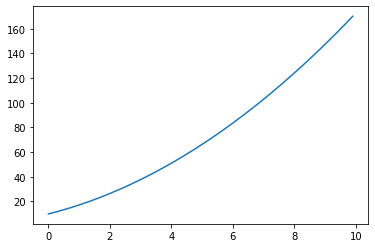

In [37]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

然而，这个类型的数值演化会是非常慢的，有一种非常有效的方式去做：使用函数`lambdify`去“编译”一个SymPy表达并代入函数再进行数值计算是非常高效的。

In [29]:
f = lambdify([x], (x + pi)**2, 'numpy')  # 第一个参数是一个变量列表
                                         # f将是以下函数的函数:本例中仅为x -> f(x)

In [30]:
y_vec = f(x_vec)  # 现在我们可以之间传入一个numpy数组而f(x)会被更有效地计算

在使用“speedup”函数而不是直接的进行数值计算时的加速是非常重要的，通常相差几个数量级。即使实在简单的例子中我们也会得到一个明显的加速：

In [31]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 28.2 ms per loop


In [32]:
%%timeit

y_vec = f(x_vec)

The slowest run took 8.86 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.93 µs per loop


## 4. 代数操作

CAS的一个主要用处是执行表达的代数操作。例如，我们可能想要展开一个乘积，一个表达式的因式，或者只是一个表达式。在本节中演示了在SymPy中进行这些基本操作的功能。

### 4.1 展开和乘积

代数操作中的第一步：

In [15]:
(x+1)*(x+2)*(x+3)

In [16]:
expand((x+1)*(x+2)*(x+3))

`expand`函数有一些关键字参数，我们可以告诉函数我们想要执行什么样的扩展。例如，为了扩展三角函数表达式，用`trig=True`的关键字参数：

In [17]:
sin(a+b)

In [18]:
expand(sin(a+b), trig=True)

有关`expand`函数可以执行的各种扩展类型的详细说明，请参见`help(expand)`。

与乘积展开相反的当然就是因式分解了。在SymPy中用`factor`函数来进行因式分解表达：

In [19]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### 4.2 化简

`simplify`尝试使用不同的技巧，去将表达简化到易懂的形式。也有很多可以替代`simplify`的函数：`trigsimp`, `powsimp`, `logcombine`等等。

这些函数的基本用法如下：

In [20]:
# simplify 展开乘积
simplify((x+1)*(x+2)*(x+3))

In [21]:
# simplify 使用三角恒等式
simplify(sin(a)**2 + cos(a)**2)

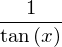

In [22]:
simplify(cos(x)/sin(x))

### 4.3 apart 和 together

为了处理分数的符号表达式，我们可以用`apart`和`together`函数：

In [41]:
f1 = 1/((a+1)*(a+2))

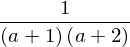

In [42]:
f1

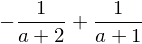

In [43]:
apart(f1)

In [44]:
f2 = 1/(a+2) + 1/(a+3)

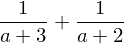

In [45]:
f2

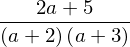

In [46]:
together(f2)

简化通常结合分数但不分解：

In [40]:
simplify(f2)

NameError: name 'f2' is not defined

## 5 微积分

除了代数操作之外，CAS的另一个主要用途是做微积分，比如代数表达式的导数和积分。

### 5.1 微分

微分通常是简单的，用`diff`函数。第一个参数是求导的表达式，第二个参数是求导的符号:

In [23]:
y

In [24]:
diff(y**2, x)

对于高阶导数我们可以这样：

In [25]:
diff(y**2, x, x)

In [26]:
diff(y**2, x, 2) # 和上面的一样

为了计算多变量表达的导数，我们可以这样做：

In [27]:
x, y, z = symbols("x,y,z")

In [28]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [29]:
diff(f, x, 1, y, 2)

## 6. 积分

积分也是以同样的方式进行的:

In [30]:
f

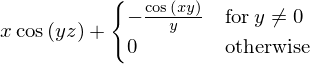

In [31]:
integrate(f, x)

通过提供积分变量的极限，我们可以计算定积分:

In [57]:
integrate(f, (x, -1, 1))

还有反常积分

In [58]:
(exp(-x**2), (x, -oo, oo))

记住，`oo`在SymPy中代表无穷。

### 6.1 加数和乘积

我们可以计算加数和乘积使用函数：'Sum'

In [38]:
n = Symbol("n")

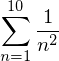

In [39]:
Sum(1/n**2, (n, 1, 10))

In [61]:
Sum(1/n**2, (n,1, 10)).evalf()

In [62]:
Sum(1/n**2, (n, 1, oo)).evalf()

乘积也是以类似的方式进行的:

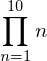

In [63]:
Product(n, (n, 1, 10)) # 10!

## 7. 极限

极限可以用`limit`函数来计算。例如：

In [40]:
limit(sin(x)/x, x, 0)

我们可以用`limit`去检查`diff`函数的推导结果：

In [65]:
f

In [66]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [67]:
h = Symbol("h")

In [68]:
limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

我们可以改变方向，从我们接近极限点使用`dir`关键字参数:

In [69]:
limit(1/x, x, 0, dir="+")

In [70]:
limit(1/x, x, 0, dir="-")

## 8. 序列

系列扩展也是CAS最有用的特性之一。在SymPy中，我们可以用`series` 函数对表达式进行级数展开:

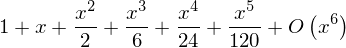

In [41]:
series(exp(x), x)

默认情况下，它在$x=0$附近扩展表达式，但是我们可以通过在函数调用中显式包含一个值来扩展$x$的任何值:

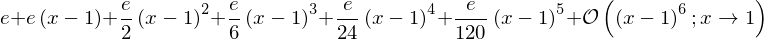

In [72]:
series(exp(x), x, 1)

可以明确定义级数展开的顺序为:

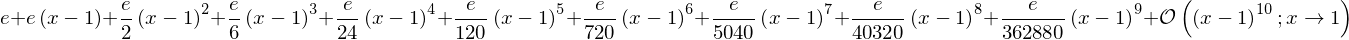

In [73]:
series(exp(x), x, 1, 10)

级数展开式包含了近似的阶数，当我们对不同阶数的级数展开式进行计算时，这对于跟踪有效性的阶数非常有用:

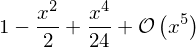

In [74]:
s1 = cos(x).series(x, 0, 5)
s1

In [75]:
s2 = sin(x).series(x, 0, 2)
s2

In [76]:
expand(s1 * s2)

如果我们想摆脱阶数信息，我们可以使用`removeO`方法:

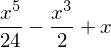

In [77]:
expand(s1.removeO() * s2.removeO())

但请注意，这不是$\cos(x)\sin(x)$到$5$的正确扩展:

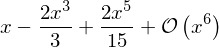

In [78]:
(cos(x)*sin(x)).series(x, 0, 6)

## 9. 线性代数

### 9.1 矩阵

使用`Matrix`类可以定义矩阵：

In [42]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

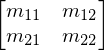

In [43]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [44]:
b = Matrix([[b1], [b2]])
b

有`Matrix`类实例的基础上我们可以做常规的矩阵代数运算：

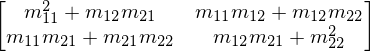

In [45]:
A**2

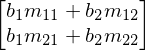

In [83]:
A * b

计算行列式和逆，诸如此类:

In [84]:
A.det()

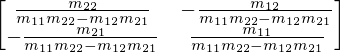

In [46]:
A.inv()

## 10. 求解方程

对于求解方程和方程组我们可以用`solve`函数：

In [86]:
solve(x**2 - 1, x)

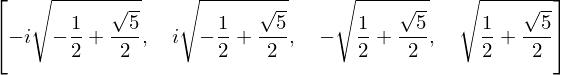

In [87]:
solve(x**4 - x**2 - 1, x)

方程组：

In [88]:
solve([x + y - 1, x - y - 1], [x,y])

在其他符号表达方面:

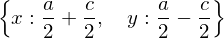

In [89]:
solve([x + y - a, x - y - c], [x,y])

## 进一步的阅读

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.

## 版本

In [90]:
%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
matplotlib 1.4.3
sympy 0.7.6
Sat Aug 15 11:37:37 2015 JST